# Approach to loan prediction




######
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


In [102]:
# ! pip install imbalanced-learn

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE


In [104]:
# ! pip install -U imbalanced-learn

In [105]:
df = pd.read_csv("dataset/loan_sanction_test.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [107]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [108]:
df.shape

(367, 12)

In [109]:
def data_prep(data):
    data['Gender']=np.where(data['Gender'].isna(),data['Gender'].mode(dropna=True),data['Gender'])
    data['Married']=np.where(data['Married'].isna(),data['Married'].mode(dropna=True),data['Married'])
    data['Dependents'].replace('3+','3',inplace=True)
    data['Dependents']=np.where(data['Dependents'].isna(),data['Dependents'].mode(dropna=True),data['Dependents'])
    data['Dependents']=data['Dependents'].astype('int')
    data['Education']=np.where(data['Education'].isna(),data['Education'].mode(dropna=True),data['Education'])
    data['Self_Employed']=np.where(data['Self_Employed'].isna(),data['Self_Employed'].mode(dropna=True),data['Self_Employed'])
    data['Credit_History']=np.where(data['Credit_History'].isna(),data['Credit_History'].mode(dropna=True),data['Credit_History'])

    for i in data.columns:
        if data[i].dtype=='float' or data[i].dtype=='int' :
            data[i]=np.where(data[i].isna(),data[i].median(),data[i])
    return data

In [110]:
data_prep(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [111]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [112]:
# convert the categorical data into numrical data
def encode(data):
    le=LabelEncoder()
    for i in data.columns:
        if data[i].dtype=='object':
            data[i]=le.fit_transform(data[i])
    return data

In [113]:
encode(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2.0,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3.0,1,1,4009,1777,113.0,360.0,1.0,2
363,363,1,1,0.0,0,0,4158,709,115.0,360.0,1.0,2
364,364,1,0,0.0,0,0,3250,1993,126.0,360.0,1.0,1
365,365,1,1,0.0,0,0,5000,2393,158.0,360.0,1.0,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int32  
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 25.9 KB


## Visualizations


<Axes: xlabel='Gender'>

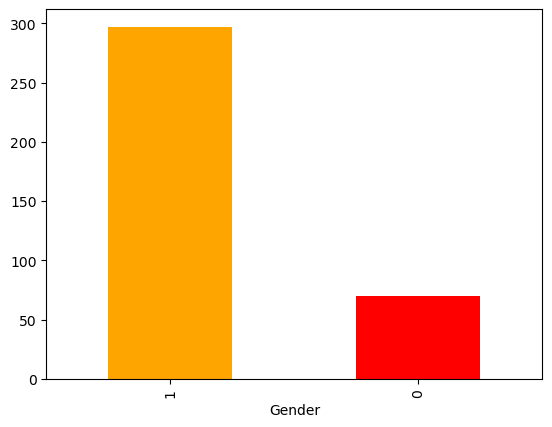

In [115]:
df['Gender'].value_counts().plot(kind='bar',color=['orange','red'])

C:\Users\Rahul\AppData\Local\Temp\ipykernel_25480\1133101134.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

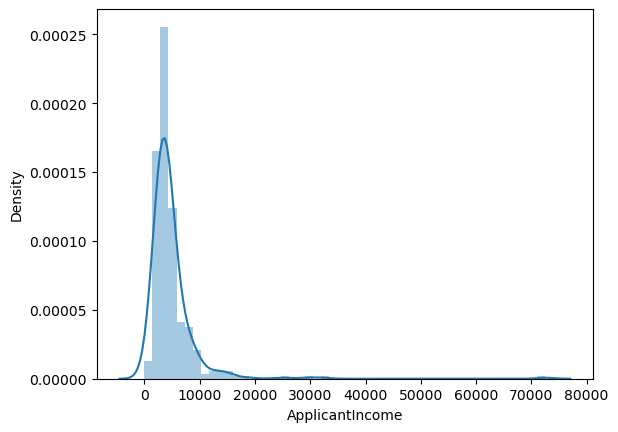

In [116]:
sns.distplot(df['ApplicantIncome'])


<Axes: ylabel='count'>

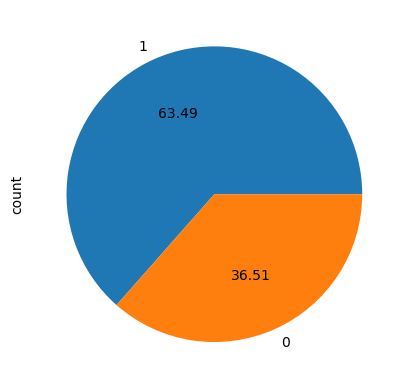

In [117]:
df['Married'].value_counts().plot(kind='pie',autopct='%.2f')


<Axes: xlabel='Self_Employed'>

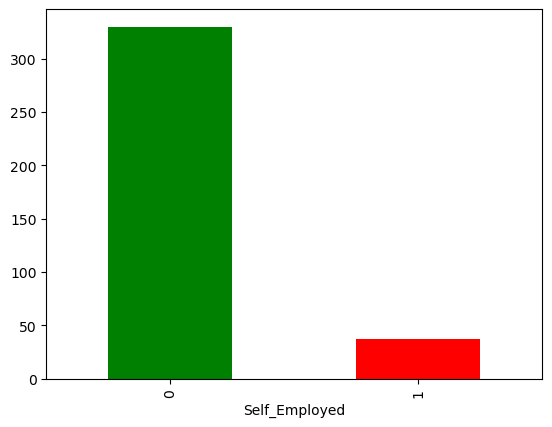

In [118]:
(df['Self_Employed'].value_counts()).plot(kind='bar',color=['green','red'])


<Axes: ylabel='count'>

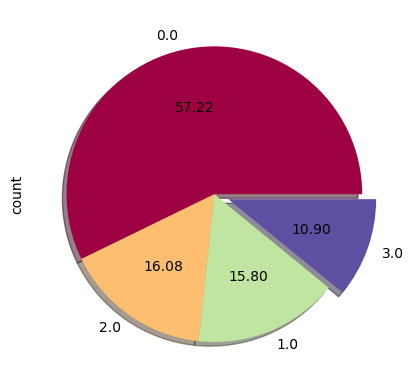

In [119]:
df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f',
                                        colormap='Spectral',shadow=1,explode=[0,0,0,0.1])

In [120]:
df.drop(['Loan_ID'],inplace=True,axis=1)


<Axes: >

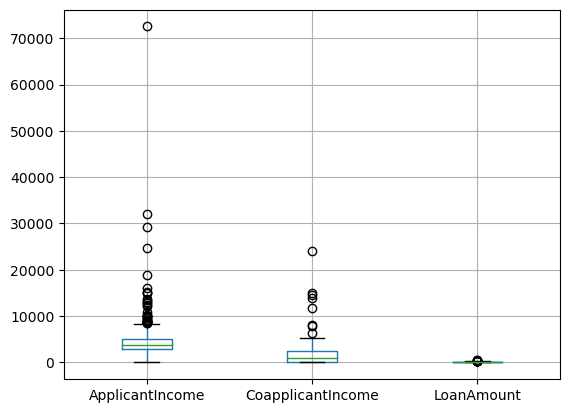

In [121]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].boxplot()


###### cube transformation for outlier

In [122]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    if df[i].skew()>0.5 or df[i].skew()<-0.65:
        df[i]=np.cbrt(df[i])

<Axes: >

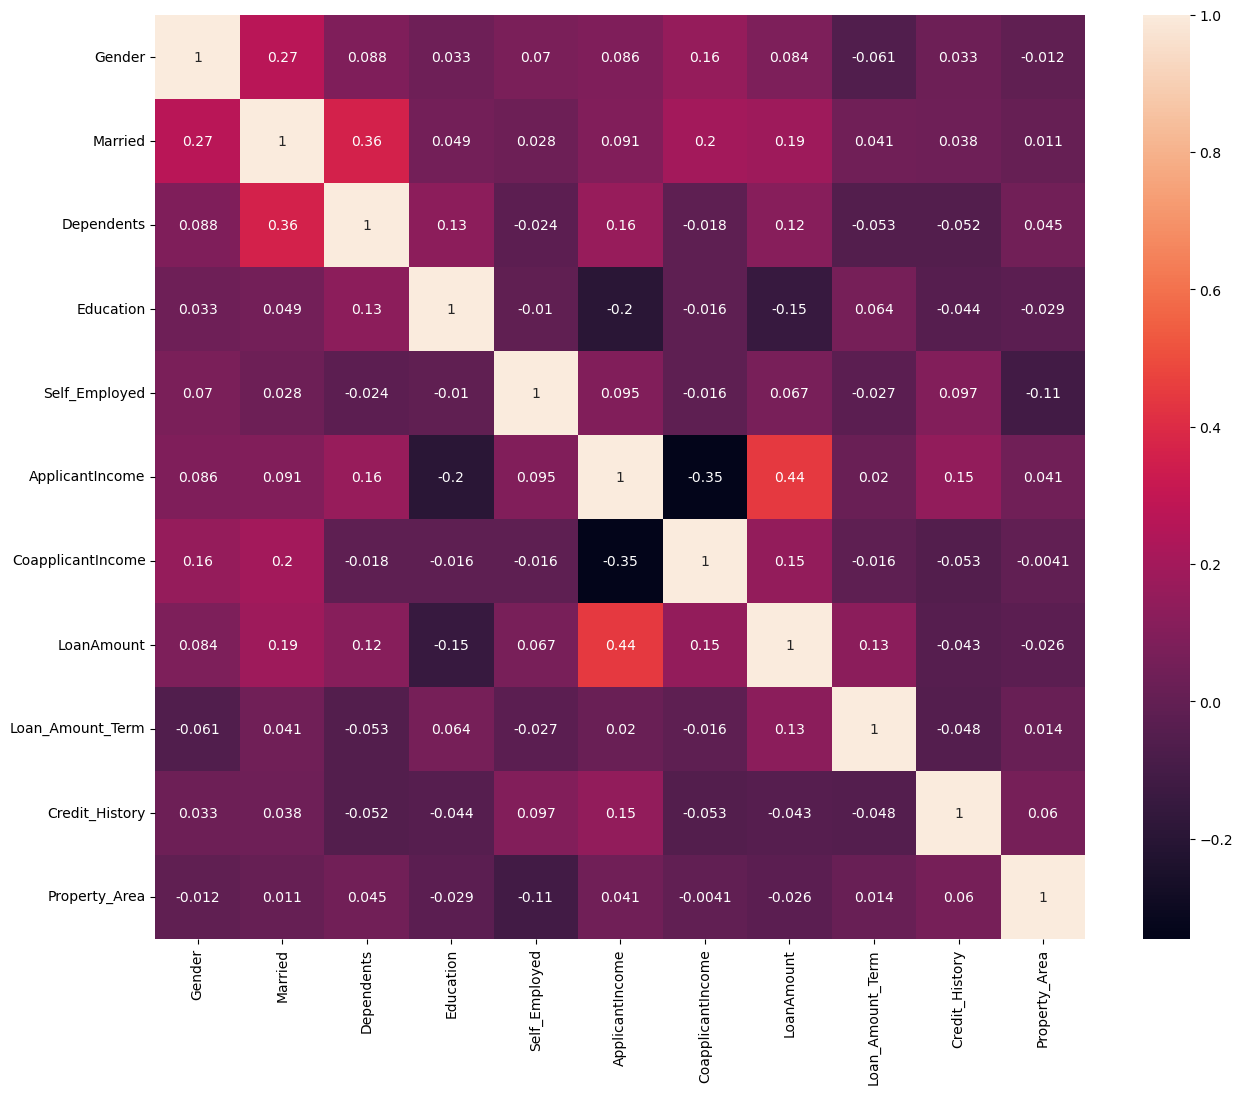

In [123]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

#### SMOTE for imbalenced Data¶


In [ ]:
! pip install imbalanced-learn

In [129]:
# from imblearn.over_sampling import SMOTE

# smote=SMOTE()
# x,y=smote.fit_resample(x,y)